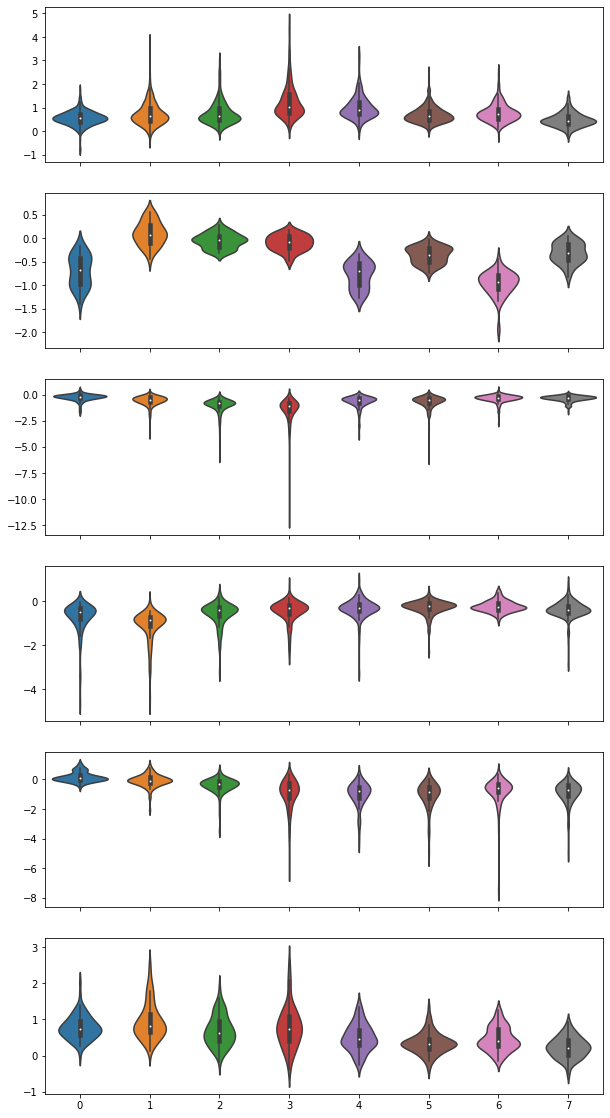

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def lib(FileName):
    def openFile(FileName):
        read_data = open(f'{FileName}')
        data = read_data.read()
        data = data.splitlines()
        read_data.close()
        
        return data
        
    lib = {}
    
    for lines in openFile(FileName):
        line = lines.split()
        if len(line[1:]) == 1:
            lib[int(line[0])] = int(line[1])
        else:
            lib[int(line[0])] = line[1:]
            
    return lib
            
lib_data = lib('Voorbeeld_clusterdata.txt')
lib_results = lib('Voorbeeld_clusterresult.txt')


def plot_clusters(data, results):
    df_data = pd.DataFrame(data)
    df_data = df_data.transpose()
    clusters = list(results.values())
    max_cluster = max(clusters)
    df_data['cluster'] = clusters
    
    fig, ax=plt.subplots(ncols=1,nrows=max_cluster+1,figsize=(10,20),sharex=True)
    
    for cluster in range(df_data['cluster'].max()+2):
        df_cluster = df_data[df_data['cluster']==cluster].copy()
        df_cluster = df_cluster.drop('cluster', axis=1)
        df_cluster = df_cluster.astype(float)
        list_column_names = list(df_cluster.columns)
        sns.violinplot(data=df_cluster, ax=ax[cluster-1])
    

df_cluster = plot_clusters(lib_data, lib_results)
df_cluster